In [1]:
## Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

In [2]:
## Change Data Path in order to Read in data from local CSVs
os.chdir(str(Path(os.getcwd()).parent / 'Data'))

# DOE & PIT EDA

I looked through these datasets with the goal of finding things to correlate / model against the other datasets; namely, the ARD data. There might be some good questions to look into regarding ARD money-flow data correlating with features found in the following DOE and PIT dataframes. Further, CEN data could be useful in normalizing population counts in DOE & PIT dataframes to get rates of homelessness by region.

# DOE Data

ed_homeless_students and ed_homeless_students_all_years contain almost identical data, with the former being slightly cleaner and having about 20 more data points to work with. ed_homeless_students also contains coc_leaid_crosswalk so we can consider the following 4 relevant dataframes:
    - rhy_grantees
    - doe_homeless_students_coc_agg
    - edyouthcount
    - ed_homeless_students*
    
 *I later argue that we shouldn't use this data set.
    
## rhy_grantees EDA

This dataframe is mostly a directory of names and contact info. The rhy_program_type, rhy_authorized_representative_title, rhy_authorized_representative_zipcode and coc info might be useful in seeing how different program types and overseers influence funding and homelessness counts by coc / location. To simplify it I'm gonna remove the unnecessary columns. This also removes most of the null values.

In [3]:
rhy_grantees = pd.read_csv('rhy_grantees.csv')
rhy_grantees.head(20)

,coc_number,coc_name,coc_state,rhy_grantee,rhy_grant_number,rhy_program_type,rhy_ado_name,rhy_authorized_representative_title,rhy_authorized_representative_email,rhy_authorized_representative_phone_number,rhy_authorized_representative_phone_number_extension,rhy_authorized_representative_address,rhy_authorized_representative_city,rhy_authorized_representative_state,rhy_authorized_representative_zipcode
0,AK-500,Anchorage CoC,AK,COVENANT HOUSE ALASKA,90CX6882,TLP,ALISON KEAR,CEO,akear@covenanthouseak.org,9.073394e+09,NaN,609 F ST,ANCHORAGE,AK,99501-3533
1,AK-500,Anchorage CoC,AK,COVENANT HOUSE ALASKA,90CY6539,BCP,JAMES KEEL,PRESIDENT/CEO,jamestkeel@thechildrenscenterinc.org,4.097655e+09,NaN,609 F ST,ANCHORAGE,AK,99501-3533
2,AK-501,Alaska Balance of State CoC,AK,FAIRBANKS COUNSELING AND ADOPTION,90YO2202,BCP,KRISTIN GIETZEN,NaN,kgietzen@arborcircle.org,6.164568e+09,NaN,912 BARNETTE ST,FAIRBANKS,AK,99701-4510
3,AK-501,Alaska Balance of State CoC,AK,JUNEAU YOUTH SERVICES,90CX6969,TLP,WALTER MAJOROS,EXECUTIVE DIRECTOR,walterm@jys.org,9.075237e+09,NaN,2075 JORDAN AVE # 101,JUNEAU,AK,99801-8095
4,AK-501,Alaska Balance of State CoC,AK,JUNEAU YOUTH SERVICES,90CY6631,BCP,MARK SUPPER,EXECUTIVE DIRECTOR,msupper@layn.org,3.234678e+09,NaN,2075 JORDAN AVE # 101,JUNEAU,AK,99801-8095
5,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",AL,CHILDREN'S AID SOCIETY,90CX6934,TLP,GAYLE WATTS,EXECUTIVE DIRECTOR,gwatts@childrensaid.org,2.059435e+09,NaN,2141 14TH AVE S,BIRMINGHAM,AL,35205-3921
6,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",AL,FAMILY CONNECTION INC,90CY6741,BCP,DENNIS HOFFMAN,PRESIDENT & CEO,d.hoffman@voa-dakotas.org,6.054446e+09,NaN,WALKER RUN #2,ALABASTER,AL,35007-4749
7,AL-503,Huntsville/North Alabama CoC,AL,MORGAN COUNTY SYSTEM OF SERVICES INC,90CY6636,BCP,TERRY POTTMEYER,PRESIDENT AND CEO,terry@friendsofyouth.org,4.258696e+09,313.0,2531 ALABAMA 20,DECATUR,AL,35601-0000
8,AL-503,Huntsville/North Alabama CoC,AL,MORGAN COUNTY SYSTEM OF SERVICES INC,90CY6732,BCP,SARAH ROBINSON,EXECUTIVE DIRECTOR,sarah@wch.org,3.166847e+09,NaN,2531 ALABAMA 20,DECATUR,AL,35601-0000
9,AL-507,Alabama Balance of State CoC,AL,TENNESSEE VALLEY FAMILY SERVICES INC,90CX6909,TLP,LYNN CAFFERY,STREET OUTREACH DIRECTOR,lcaffery@comcast.net,2.564898e+09,NaN,1327 GUNTER AVE,GUNTERSVILLE,AL,35976-1130


In [4]:
rhy_grantees.isnull().sum()

coc_number                                                0
coc_name                                                  0
coc_state                                                 0
rhy_grantee                                               0
rhy_grant_number                                          0
rhy_program_type                                          0
rhy_ado_name                                             11
rhy_authorized_representative_title                      71
rhy_authorized_representative_email                      11
rhy_authorized_representative_phone_number               12
rhy_authorized_representative_phone_number_extension    513
rhy_authorized_representative_address                     0
rhy_authorized_representative_city                        0
rhy_authorized_representative_state                       0
rhy_authorized_representative_zipcode                     0
dtype: int64

In [5]:
len(rhy_grantees)

585

In [7]:
rhy_grantees.rename(columns = {'coc_number': 'cocnumber'}, inplace= True)

relevant_cols = rhy_grantees.columns[[0,1,2,5,7,-1]]

rhy_grantees_cleaned = rhy_grantees[relevant_cols]

rhy_grantees_cleaned['rhy_authorized_representative_title'].fillna('N/A', inplace = True)

rhy_grantees_cleaned.to_csv('rhy_grantees_cleaned.to_csv', index = False)

rhy_grantees_cleaned.head(20)

C:\Users\James\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,cocnumber,coc_name,coc_state,rhy_program_type,rhy_authorized_representative_title,rhy_authorized_representative_zipcode
0,AK-500,Anchorage CoC,AK,TLP,CEO,99501-3533
1,AK-500,Anchorage CoC,AK,BCP,PRESIDENT/CEO,99501-3533
2,AK-501,Alaska Balance of State CoC,AK,BCP,N/A,99701-4510
3,AK-501,Alaska Balance of State CoC,AK,TLP,EXECUTIVE DIRECTOR,99801-8095
4,AK-501,Alaska Balance of State CoC,AK,BCP,EXECUTIVE DIRECTOR,99801-8095
5,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",AL,TLP,EXECUTIVE DIRECTOR,35205-3921
6,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",AL,BCP,PRESIDENT & CEO,35007-4749
7,AL-503,Huntsville/North Alabama CoC,AL,BCP,PRESIDENT AND CEO,35601-0000
8,AL-503,Huntsville/North Alabama CoC,AL,BCP,EXECUTIVE DIRECTOR,35601-0000
9,AL-507,Alabama Balance of State CoC,AL,TLP,STREET OUTREACH DIRECTOR,35976-1130


Lets see whats in this sucker.

In [10]:
coc_grantee_count = rhy_grantees_cleaned['cocnumber'].value_counts()
state_grantee_count = rhy_grantees_cleaned['coc_state'].value_counts()
program_type_count = rhy_grantees_cleaned['rhy_program_type'].value_counts()
representative_title_count = rhy_grantees_cleaned['rhy_authorized_representative_title'].value_counts()

In [11]:
coc_grantee_count.head(15)

TX-607    14
MN-501    13
IL-510    11
PA-509    10
OR-505     8
DC-500     8
OR-501     8
WA-501     7
ME-500     7
CA-600     7
WA-500     7
CT-505     7
CO-503     7
MN-500     6
WI-501     6
Name: cocnumber, dtype: int64

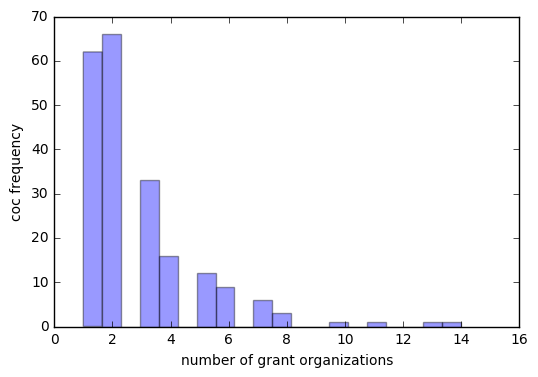

In [12]:
sns.distplot(coc_grantee_count, kde = False)
plt.xlabel('number of grant organizations')
plt.ylabel('coc frequency')
plt.show()

In [15]:
state_grantee_count.head(15)

CA    58
TX    33
NY    32
IL    31
MI    30
FL    30
OR    22
MN    21
PA    19
WA    18
OH    17
WI    16
MO    16
MA    15
GA    15
Name: coc_state, dtype: int64

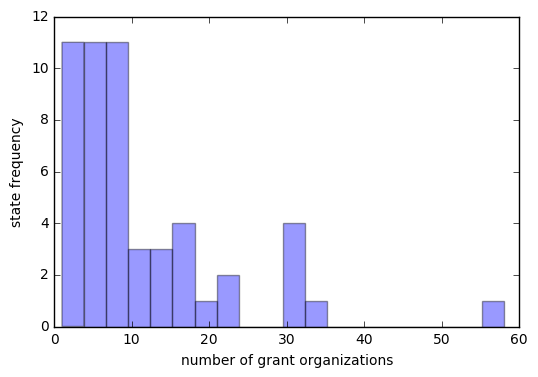

In [16]:
sns.distplot(state_grantee_count, bins = 20, kde = False)
plt.xlabel('number of grant organizations')
plt.ylabel('state frequency')
plt.show()

In [18]:
program_type_count.head()

BCP    388
TLP    197
Name: rhy_program_type, dtype: int64

In [19]:
program_type_count_by_state = pd.DataFrame(columns = ['coc_state', 'BCP', 'TLP'])
for state in rhy_grantees_cleaned['coc_state'].unique():
    state_count = rhy_grantees_cleaned[rhy_grantees_cleaned['coc_state'] == state]['rhy_program_type'].value_counts()
    if 'TLP' not in state_count.index:
        entry_data = [state, state_count['BCP'], 0]
    elif 'BCP' not in state_count.index:
        entry_data = [state, 0, state_count['TLP']]
    else:
        entry_data = [state, state_count['BCP'], state_count['TLP']]
    entry = pd.DataFrame(data = [entry_data], columns = ['coc_state', 'BCP', 'TLP'])
    program_type_count_by_state = program_type_count_by_state.append(entry)

program_type_count_by_state.sort('BCP', inplace = True, ascending = False)
program_type_count_by_state.head(10)

C:\Users\James\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coc_state,BCP,TLP
0,CA,42.0,16.0
0,TX,25.0,8.0
0,FL,22.0,8.0
0,IL,20.0,11.0
0,MI,19.0,11.0
0,NY,19.0,13.0
0,OR,15.0,7.0
0,OH,13.0,4.0
0,WI,12.0,4.0
0,PA,11.0,8.0


In [21]:
program_type_count_by_state.tail(10)

,coc_state,BCP,TLP
0,ID,2.0,0.0
0,WV,2.0,1.0
0,AR,2.0,2.0
0,VT,1.0,2.0
0,MT,1.0,1.0
0,SC,1.0,3.0
0,RI,1.0,0.0
0,HI,1.0,1.0
0,DE,1.0,0.0
0,WY,1.0,1.0


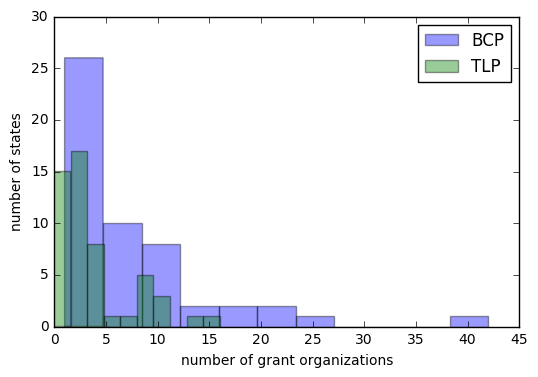

In [22]:
sns.distplot(program_type_count_by_state['BCP'], kde = False)
sns.distplot(program_type_count_by_state['TLP'], kde = False)
plt.xlabel('number of grant organizations')
plt.ylabel('number of states')
plt.legend(labels = ['BCP', 'TLP'])
plt.show()

In [24]:
representative_title_count.head()

EXECUTIVE DIRECTOR         277
N/A                         71
CHIEF EXECUTIVE OFFICER     47
PRESIDENT/CEO               30
PRESIDENT AND CEO           19
Name: rhy_authorized_representative_title, dtype: int64

All of these distributions are heavily skewed with larger / more urban states getting more grant support. I would like to see the distributions once normalized by CEN population data.

## doe_homeless_students_coc_agg EDA

This data frame is perfect.

In [26]:
# sort s.t. we establish a time-series by coc
doe_homeless_students_coc_agg = pd.read_csv('doe_homeless_students_coc_agg.csv')#.sort_values(by = ['coc_number', 'year'])
# rename s.t. we can join with other 2 relevant dataframes easily
doe_homeless_students_coc_agg.rename(columns = {'coc_number' : 'cocnumber'}, inplace = True)
# save cleaned dataset
doe_homeless_students_coc_agg.to_csv('doe_homeless_students_coc_agg_cleaned.csv', index = False)
doe_homeless_students_coc_agg.head(20)

,year,cocnumber,doe_total_count,doe_unsheltered,doe_sheltered,doe_hotel_motel,doe_doubled_up
0,2014,AK-500,2155,137,512,269,1237
1,2015,AK-500,2217,91,551,224,1351
2,2016,AK-500,2905,155,819,236,1695
3,2017,AK-500,2476,168,454,166,1688
4,2014,AK-501,1772,221,388,91,1041
5,2015,AK-501,1890,232,474,77,1045
6,2016,AK-501,2127,265,490,114,1209
7,2017,AK-501,1642,240,272,63,1003
8,2014,AL-500,2758,16,208,50,2214
9,2015,AL-500,2907,13,152,115,2511


In [27]:
# very clean ... almost TOO clean
doe_homeless_students_coc_agg.isnull().sum()

year               0
cocnumber          0
doe_total_count    0
doe_unsheltered    0
doe_sheltered      0
doe_hotel_motel    0
doe_doubled_up     0
dtype: int64

In [28]:
len(doe_homeless_students_coc_agg)

1584

In [29]:
years = doe_homeless_students_coc_agg['year'].unique()
cocs = doe_homeless_students_coc_agg['cocnumber'].unique()
states = [coc[:2] for coc in cocs]

#### creating doe_homeless_students_coc_agg_rates

Here's a dataframe with differences in counts year-to-year by coc. It would be good to aggregate the rates by state, normalize by CEN population data and compare distributions nationwide with ARD data.


In [30]:
# making a dataframe of differences to see change year-by-year
doe_homeless_students_coc_agg_rates = pd.DataFrame(columns = ['year', 'cocnumber', 'doe_total_rate', 'doe_unsheltered_rate', 'doe_sheltered_rate', 'doe_hotel_motel_rate', 'doe_doubled_up_rate'])

numerics = doe_homeless_students_coc_agg.columns[2:]

for coc in cocs:
    pit = doe_homeless_students_coc_agg[doe_homeless_students_coc_agg['cocnumber'] == coc]
    
    for i in range(1, len(pit)):
        row1 = pit.iloc[i-1]
        row2 = pit.iloc[i]
        
        yr = str(row1['year']) + '-' + str(row2['year'])
        
        entry_data = [yr, coc] + list(row2[numerics] - row1[numerics])
        
        entry = pd.DataFrame(index = [pit.index[i]], data = [entry_data], columns = ['year', 'cocnumber', 'doe_total_rate', 'doe_unsheltered_rate', 'doe_sheltered_rate', 'doe_hotel_motel_rate', 'doe_doubled_up_rate'])
        
        doe_homeless_students_coc_agg_rates = doe_homeless_students_coc_agg_rates.append(entry)
        
doe_homeless_students_coc_agg_rates.to_csv('doe_homeless_students_coc_agg_rates.csv', index = False)

doe_homeless_students_coc_agg_rates.head(20)

,year,cocnumber,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate
1,2014-2015,AK-500,62.0,-46.0,39.0,-45.0,114.0
2,2015-2016,AK-500,688.0,64.0,268.0,12.0,344.0
3,2016-2017,AK-500,-429.0,13.0,-365.0,-70.0,-7.0
5,2014-2015,AK-501,118.0,11.0,86.0,-14.0,4.0
6,2015-2016,AK-501,237.0,33.0,16.0,37.0,164.0
7,2016-2017,AK-501,-485.0,-25.0,-218.0,-51.0,-206.0
9,2014-2015,AL-500,149.0,-3.0,-56.0,65.0,297.0
10,2015-2016,AL-500,-857.0,-10.0,-96.0,-20.0,-822.0
11,2016-2017,AL-500,-8.0,18.0,34.0,39.0,46.0
13,2014-2015,AL-501,-124.0,-126.0,282.0,-303.0,26.0


## edyouthcount

uhy ~ unaccompanied homeless youth  

lep ~ limited english proficiency  

cdw ~ corporate data warehouse (counting veteran homelessness?)

lea ~ local education agency

Aside from the above fields, it seems that the counts (columns 3 thru 7) are either taken from doe_homeless_student_coc_agg or are a sum of data over the leas in each coc (which can be found in ed_homeless_students).


In [31]:
edyouthcount = pd.read_csv('edyouthcount.csv').drop(0)
edyouthcount.head(20)

,cocnumber,of_leas_in_coc,total_hcy_count,hotels_motels,unsheltered,sheltered,doubled_up,cdw,lep,uhy
1,AK-500,2,2476.0,166.0,168.0,454.0,1688.0,599.0,500.0,470.0
2,AK-501,20,1642.0,63.0,240.0,272.0,1007.0,426.0,134.0,396.0
3,AL-500,14,1938.0,134.0,21.0,84.0,1652.0,258.0,105.0,59.0
4,AL-501,5,6159.0,156.0,63.0,295.0,5636.0,891.0,134.0,175.0
5,AL-502,11,875.0,11.0,33.0,44.0,763.0,167.0,16.0,28.0
6,AL-503,8,726.0,102.0,15.0,81.0,513.0,145.0,54.0,67.0
7,AL-504,6,1216.0,80.0,16.0,78.0,1040.0,136.0,27.0,49.0
8,AL-506,2,432.0,53.0,NaN,16.0,352.0,62.0,15.0,17.0
9,AL-507,57,2731.0,93.0,133.0,55.0,1852.0,364.0,134.0,39.0
10,AR-500,23,2076.0,77.0,8.0,181.0,1637.0,279.0,148.0,57.0


In [32]:
edyouthcount.isnull().sum()

cocnumber           1
of_leas_in_coc      0
total_hcy_count     1
hotels_motels      16
unsheltered        74
sheltered           5
doubled_up          3
cdw                 5
lep                28
uhy                36
dtype: int64

In [33]:
len(edyouthcount)

394

In [34]:
edyouthcount[edyouthcount['cocnumber'].isnull()]

,cocnumber,of_leas_in_coc,total_hcy_count,hotels_motels,unsheltered,sheltered,doubled_up,cdw,lep,uhy
394,NaN,25444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Remove extraneous entry
edyouthcount.drop(394, inplace = True)

In [36]:
edyouthcount.isnull().sum()

cocnumber           0
of_leas_in_coc      0
total_hcy_count     0
hotels_motels      15
unsheltered        73
sheltered           4
doubled_up          2
cdw                 4
lep                27
uhy                35
dtype: int64

In [38]:
edyouthcount.to_csv('edyouthcount_cleaned.csv', index = False)

#  PIT Data

This is useful extra info, not the cleanest but manageable. Might wanna keep it around if we wanna link up this data with doe counts and census data.

In [39]:
pit_all = pd.read_csv('pit_all.csv')
pit_all.head(20)

,year,coc_number,coc_name,coc_category,pit_overall_homeless,pit_sheltered_es_homeless,pit_sheltered_th_homeless,pit_sheltered_sh_homeless,pit_sheltered_total_homeless,pit_unsheltered_homeless,...,pit_homeless_parenting_youth_age_18_to_24,pit_sheltered_es_homeless_parenting_youth_age_18_to_24,pit_sheltered_th_homeless_parenting_youth_age_18_to_24,pit_sheltered_total_homeless_parenting_youth_age_18_to_24,pit_unsheltered_homeless_parenting_youth_age_18_to_24,pit_homeless_children_of_parenting_youth,pit_sheltered_es_homeless_children_of_parenting_youth,pit_sheltered_th_homeless_children_of_parenting_youth,pit_sheltered_total_homeless_children_of_parenting_youth,pit_unsheltered_homeless_children_of_parenting_youth
0,2007,AK-500,Anchorage CoC,Other Urban CoCs,974,548,294,0,842,132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,AK-500,Anchorage CoC,Other Urban CoCs,1023,535,386,0,921,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,AK-501,Alaska Balance of State CoC,Rural CoCs,668,350,195,0,545,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,AK-501,Alaska Balance of State CoC,Rural CoCs,623,312,219,0,531,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,2104,465,775,0,1240,864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,2104,465,775,0,1240,864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2007,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,649,113,297,0,410,239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,AL-501,Mobile City & County/Baldwin County CoC,Other Urban CoCs,524,156,185,0,341,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,AL-502,Florence/Northwest Alabama CoC,Rural CoCs,265,13,118,0,131,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2007,AL-503,Huntsville/North Alabama CoC,Other Urban CoCs,830,336,420,0,756,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
for column in pit_all.columns:
    print(column, 'Null Values: ', pit_all[column].isnull().sum())

year Null Values:  0
coc_number Null Values:  0
coc_name Null Values:  0
coc_category Null Values:  24
pit_overall_homeless Null Values:  0
pit_sheltered_es_homeless Null Values:  0
pit_sheltered_th_homeless Null Values:  0
pit_sheltered_sh_homeless Null Values:  0
pit_sheltered_total_homeless Null Values:  0
pit_unsheltered_homeless Null Values:  0
pit_homeless_individuals Null Values:  0
pit_sheltered_es_homeless_individuals Null Values:  0
pit_sheltered_th_homeless_individuals Null Values:  0
pit_sheltered_sh_homeless_individuals Null Values:  0
pit_sheltered_total_homeless_individuals Null Values:  0
pit_unsheltered_homeless_individuals Null Values:  0
pit_homeless_people_in_families Null Values:  0
pit_sheltered_es_homeless_people_in_families Null Values:  0
pit_sheltered_th_homeless_people_in_families Null Values:  0
pit_sheltered_total_homeless_people_in_families Null Values:  0
pit_unsheltered_homeless_people_in_families Null Values:  0
pit_homeless_family_households Null Value

In [41]:
len(pit_all)

4725

In [42]:
pit_all['coc_category'].fillna('N/A', inplace = True)
pit_all[pit_all.columns[4:]].fillna(0, inplace = True)
pit_all.to_csv('pit_all_cleaned.csv', index = False)
pit_all['coc_category'].value_counts()

C:\Users\James\Anaconda3\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Suburban CoCs       2071
Rural CoCs          1346
Other Urban CoCs     708
Major Cities         576
N/A                   24
Name: coc_category, dtype: int64

In [43]:
homelessness_by_coc_category = pit_all[pit_all.columns[3:]].groupby('coc_category').sum()
homelessness_by_coc_category

,pit_overall_homeless,pit_sheltered_es_homeless,pit_sheltered_th_homeless,pit_sheltered_sh_homeless,pit_sheltered_total_homeless,pit_unsheltered_homeless,pit_homeless_individuals,pit_sheltered_es_homeless_individuals,pit_sheltered_th_homeless_individuals,pit_sheltered_sh_homeless_individuals,...,pit_homeless_parenting_youth_age_18_to_24,pit_sheltered_es_homeless_parenting_youth_age_18_to_24,pit_sheltered_th_homeless_parenting_youth_age_18_to_24,pit_sheltered_total_homeless_parenting_youth_age_18_to_24,pit_unsheltered_homeless_parenting_youth_age_18_to_24,pit_homeless_children_of_parenting_youth,pit_sheltered_es_homeless_children_of_parenting_youth,pit_sheltered_th_homeless_children_of_parenting_youth,pit_sheltered_total_homeless_children_of_parenting_youth,pit_unsheltered_homeless_children_of_parenting_youth
coc_category,,,,,,,,,,,,,,,,,,,,,
Major Cities,3227518,1448808,731229,7844,2187881,1039637,2114019,749998,386525,7844,...,19546.0,13870.0,5386.0,19256.0,290.0,25323.0,17326.0,7643.0,24969.0,354.0
N/A,10285,6284,2103,11,8398,1887,4164,1098,1717,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Urban CoCs,489122,209550,150123,1384,361057,128065,334261,147391,74615,1384,...,1970.0,994.0,917.0,1911.0,59.0,2818.0,1391.0,1357.0,2748.0,70.0
Rural CoCs,1456260,467066,354220,1329,822615,633645,851070,280468,142547,1329,...,6212.0,2396.0,2812.0,5208.0,1004.0,8362.0,3354.0,3771.0,7125.0,1237.0
Suburban CoCs,2001778,732935,528526,5662,1267123,734655,1251750,407961,245967,5662,...,9720.0,5692.0,3507.0,9199.0,521.0,13382.0,7775.0,4932.0,12707.0,675.0


Rural and suburban cocs together contribute as much to the overall homeless count as major cities. Might be good to look into what coc categories are getting the most funding.